## Question: What are the factors contributing to a persons chance of survival in RMS Titanic?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv') # Gathering data

# Assessing Data

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

 From initial look on the dataset and the question in mind, It is sure that columns named PassengerId, Name, Ticket will not contribute to our analysis, thus, we should drop those columns

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.drop(columns=['PassengerId','Name','Ticket',],inplace=True)

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


 From the above output, we see that Age, Cabin, and Embarked have missing values. So lets deal with them.

In [10]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age columns has a large standard deviation from the mean value. That means it's not possible to simply fill the missing values as the mean value. So we will need a work around, that is we will generate a list of random numbers equal to the length of missing values between (mean-std) and (mean+std)

In [11]:
import random

In [12]:
print('Number of Missing values in Age:',data['Age'].isnull().sum())

Number of Missing values in Age: 177


In [13]:
mean = data['Age'].mean()
std = data['Age'].std()
lower_limit = round(mean-std,0)
upper_limit = round(mean+std,0)
random_list=[]
for i in range(0,177):
    random_list.append(random.randint(lower_limit,upper_limit))

In [14]:
random_list=np.array(random_list)

In [15]:
age=data['Age'].values

In [16]:
k=0
for i,j in enumerate(age):
    if np.isnan(age[i]):
        age[i]=random_list[k]
        k+=1

In [17]:
data['Age']=age

In [18]:
print('Number of missing values in age: ',data['Age'].isnull().sum())

Number of missing values in age:  0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


##### Now Age column has been dealt with, moving on to Cabin column.  

In [20]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [21]:
print('Number of missing values in Cabin column: ',data['Cabin'].isnull().sum())

Number of missing values in Cabin column:  687


##### Cabin column has a large number of missing values, and it doesn't seem important for our analysis. So we will just drop it

In [22]:
data.drop(columns=['Cabin'],inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### Moving on to Embarked column

In [24]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

##### Embarked column has just 2 missing values, so we will simply fill it up with the most common value, that is 'S'

In [25]:
data['Embarked'].fillna('S',inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


##### Now that our Data has no missing values, we can move on to Exploring the Data.

# Exploring Data

##### For simplicities sake, we will update Pclass column to contain strings for better visualisation.

In [27]:
data['Pclass']=data['Pclass'].astype('object')
data['Pclass'].replace({1:'Upper Class',2:'Middle Class',3:'Lower Class'},inplace=True)

In [28]:
# Seeing the correlation in the data
print(data.corr())

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.049431 -0.035322  0.081629  0.257307
Age      -0.049431  1.000000 -0.242056 -0.163441  0.096656
SibSp    -0.035322 -0.242056  1.000000  0.414838  0.159651
Parch     0.081629 -0.163441  0.414838  1.000000  0.216225
Fare      0.257307  0.096656  0.159651  0.216225  1.000000


#### Q) Number of people on the basis of gender, and class onboard the titanic.

In [29]:
print(data.groupby('Sex')['Survived'].count())
print('\n\n',data.groupby('Pclass')['Survived'].count())

Sex
female    314
male      577
Name: Survived, dtype: int64


 Pclass
Lower Class     491
Middle Class    184
Upper Class     216
Name: Survived, dtype: int64


#### Q) Total number of people who survived the titanic in train.csv dataset.

In [30]:
print(data.groupby('Survived').size())
# 0 = Not Survived
# 1 = Surived

Survived
0    549
1    342
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


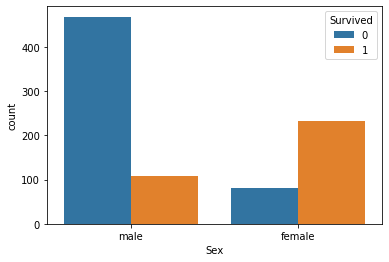

In [46]:
print(sns.countplot(x='Sex',hue='Survived',data=data))

#### Out of 891 passengers in the train.csv dataset, only 342 survived in which most were females.

In [32]:
print(data.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


#### Now, lets try to find out whether class of a person contributed to its likelihood of survival, here class 1 indicates people belonging to upper class of society, class 2 is middle class, and class 3 is lower class.

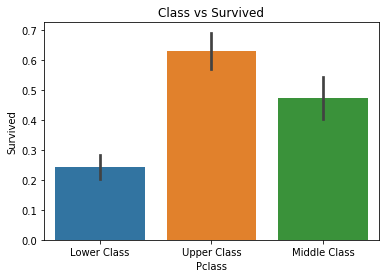

In [33]:
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title('Class vs Survived')
plt.show()

#### By the above graph, we get to know that people belonging to upper class of society survived more than people of middle, and lower classes.  Lets find out the exact number of people who survived on the basis of class

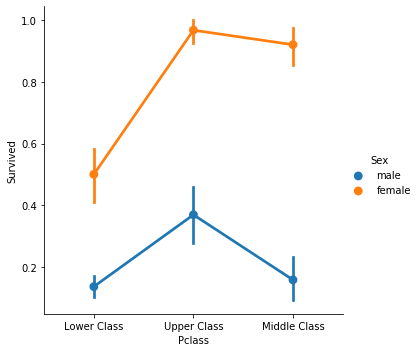

In [48]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='point')

In [34]:
print(data.groupby(['Survived','Pclass']).size())
print('\n\n',data.groupby(['Sex','Pclass','Survived']).size())

Survived  Pclass      
0         Lower Class     372
          Middle Class     97
          Upper Class      80
1         Lower Class     119
          Middle Class     87
          Upper Class     136
dtype: int64


 Sex     Pclass        Survived
female  Lower Class   0            72
                      1            72
        Middle Class  0             6
                      1            70
        Upper Class   0             3
                      1            91
male    Lower Class   0           300
                      1            47
        Middle Class  0            91
                      1            17
        Upper Class   0            77
                      1            45
dtype: int64


#### Thus, from the above data, and the visualisation, we can infer that people belonging to upper class were given more priority during the rescue operation.  
#### 62% of people belonging to upper class survived, whereas only 47% and 24% of people belonging to middle, and lower classes survived the crash.

In [35]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [36]:
pd.cut(data['Age'],10).tail()

886    (24.294, 32.252]
887    (16.336, 24.294]
888     (32.252, 40.21]
889    (24.294, 32.252]
890    (24.294, 32.252]
Name: Age, dtype: category
Categories (10, interval[float64]): [(0.34, 8.378] < (8.378, 16.336] < (16.336, 24.294] < (24.294, 32.252] ... (48.168, 56.126] < (56.126, 64.084] < (64.084, 72.042] < (72.042, 80.0]]

In [ ]:
#data['AgeGrp']=0
#data.loc[(data['Age']<=11),'AgeGrp']=0
#data.loc[(data['Age']>11) & (data['Age']<=22),'AgeGrp']=1
#data.loc[(data['Age']>22) & (data['Age']<=34),'AgeGrp']=2
#data.loc[(data['Age']>34) & (data['Age']<=45),'AgeGrp']=3
#data.loc[(data['Age']>45) & (data['Age']<=57),'AgeGrp']=4
#data.loc[(data['Age']>57) & (data['Age']<=68) ,'AgeGrp']=5
#data.loc[(data['Age']>68) ,'AgeGrp']=6

In [37]:
#data['AgeGrp']=0
#data.loc[(data['Age']<=8),'AgeGrp']=0
#data.loc[(data['Age']>8) & (data['Age']<=16),'AgeGrp']=1
#data.loc[(data['Age']>16) & (data['Age']<=24),'AgeGrp']=2
#data.loc[(data['Age']>24) & (data['Age']<=32),'AgeGrp']=3
#data.loc[(data['Age']>32) & (data['Age']<=40),'AgeGrp']=4
#data.loc[(data['Age']>40) & (data['Age']<=48) ,'AgeGrp']=5
#data.loc[(data['Age']>48) & (data['Age']<=56),'AgeGrp']=6
#data.loc[(data['Age']>56) & (data['Age']<=64),'AgeGrp']=7
#data.loc[(data['Age']>64) & (data['Age']<=72),'AgeGrp']=8
#data.loc[(data['Age']>72) & (data['Age']<=80),'AgeGrp']=9

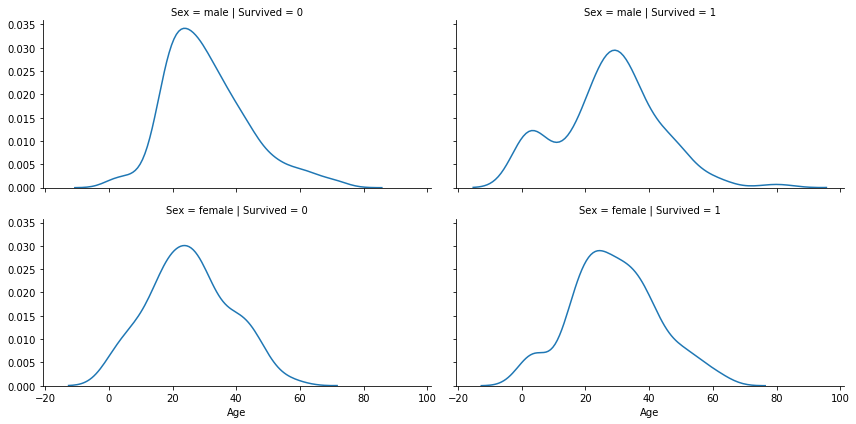

In [38]:
# Probability density function of Age
#plt.figure(figsize=(20,10))
facet=sns.FacetGrid(row='Sex',col='Survived',data=data,aspect=2)
facet.map(sns.distplot,'Age',hist=False)
plt.show()

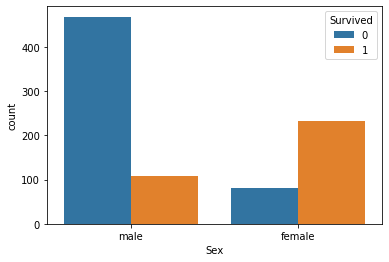

In [39]:
sns.countplot(x='Sex',hue='Survived',data=data)

#### From the above visualisations, we can infer that Infants, and Females were given more priority in the rescue operation.

#### While Men roughly had a higher chance of survival between age of 18 and 50 years old; women, roughly had a higher chance of survival between age of 15 and 50 years old.


In [40]:
data.corr()

,Survived,Age,SibSp,Parch,Fare,AgeGrp
Survived,1.000000,-0.049431,-0.035322,0.081629,0.257307,-0.051969
Age,-0.049431,1.000000,-0.242056,-0.163441,0.096656,0.985171
SibSp,-0.035322,-0.242056,1.000000,0.414838,0.159651,-0.236970
Parch,0.081629,-0.163441,0.414838,1.000000,0.216225,-0.160295
Fare,0.257307,0.096656,0.159651,0.216225,1.000000,0.096033
AgeGrp,-0.051969,0.985171,-0.236970,-0.160295,0.096033,1.000000


#### Moving on to SibSp and Parch, these two columns signify the number of relatives a person had on titanic, thus it would be better that we make a new column 'Relatives' out of SibSp and Parch.

In [41]:
data['Relatives']=data['SibSp']+data['Parch']

In [42]:
data.corr()

,Survived,Age,SibSp,Parch,Fare,AgeGrp,Relatives
Survived,1.000000,-0.049431,-0.035322,0.081629,0.257307,-0.051969,0.016639
Age,-0.049431,1.000000,-0.242056,-0.163441,0.096656,0.985171,-0.247090
SibSp,-0.035322,-0.242056,1.000000,0.414838,0.159651,-0.236970,0.890712
Parch,0.081629,-0.163441,0.414838,1.000000,0.216225,-0.160295,0.783111
Fare,0.257307,0.096656,0.159651,0.216225,1.000000,0.096033,0.217138
AgeGrp,-0.051969,0.985171,-0.236970,-0.160295,0.096033,1.000000,-0.242042
Relatives,0.016639,-0.247090,0.890712,0.783111,0.217138,-0.242042,1.000000


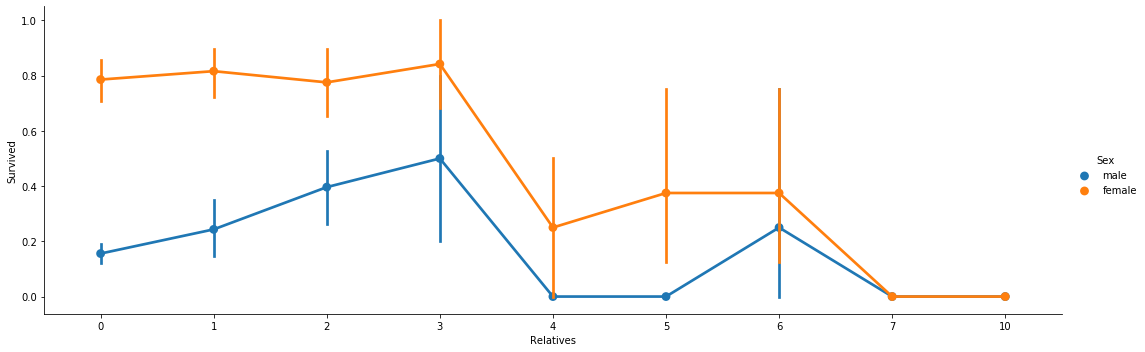

In [45]:
sns.catplot(x='Relatives',y='Survived',data=data,hue='Sex',kind='point',aspect=3)

#### This shows that while there is a higher chance of survival for men between 1 to 3 relatives and lower in the case of having none, or 6 relatives. Women have a higher chance of survival having relaives between 0 to 4

# Conclusion

From the above analysis, we can conclude that a persons likelihood of a chance of survival increases when:  
Sex = Male  
Age = Infants, or between 18 and 50 years old  
Class = Upper or Middle  
Relatives = Between 1 to 3
  
or,  
  
Sex = Female  
Age = Infants, or between 15 and 50 years old  
Class = Any  
Relatives = Between 0 to 4